In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

# Trajectory shape descriptor

Taken from "Dense trajectories and motion boundary descriptors for
action recognition". Link at time of writing: https://hal.archives-ouvertes.fr/file/index/docid/803241/filename/IJCV.pdf.

Given a trajectory of length $L$, we describe its shape by a sequence $(\Delta P_t , \ldots, \Delta P_{t+L-1})$ of displacement vectors $\Delta P_t = (P_{t+1}-P_t) = (x_{t+1}-x_t, y_{t+1}-y_t)$. The resulting vector is normalized by the sum of displacement vector magnitudes.

$$
T = \frac{ (\Delta P_t , \ldots, \Delta P_{t+L-1}) }{ \sum_{j=t}^{t+L-1} \lVert \Delta P_j \rVert }
$$

They refer to this as a $\textbf{trajectory}$.

In [3]:
# load trajectory
tracks = np.load('sample_data/1001-8_roi_0_tracks.npy')
xs, ys = tracks['coords'][0].T
n_pts = len(xs)

In [4]:
# x = np.array([-1, +1, +1, -1])
# y = np.array([-1, -1, +1, +1])
# ang = np.arctan2(y, x) * 180 / np.pi
# ang[ang<0] = ang[ang<0] + 360.0
# print(ang)
# fig, ax = plt.subplots()
# ax.grid(True)
# ax.set_xlim(-1.1, 1.1); ax.set_ylim(-1.1, 1.1)
# ax.arrow(0, 0, x[-1], y[-1], head_width=0.05, head_length=0.1, length_includes_head=True)

In [5]:
# displacement vectors
P_x = xs[1:] - xs[:-1]
P_y = ys[1:] - ys[:-1]
# normalize by sum of displacement vector magnitudes
mag = np.sqrt(P_x**2 + P_y**2)
P_x /= mag.sum()
P_y /= mag.sum()
# compute angles of displacement vectors
ang = np.arctan2(P_y, P_x) * 180 / np.pi
ang[ang<0] = ang[ang<0] + 360.0  # map angles to range [0,360]

<IPython.core.display.Javascript object>


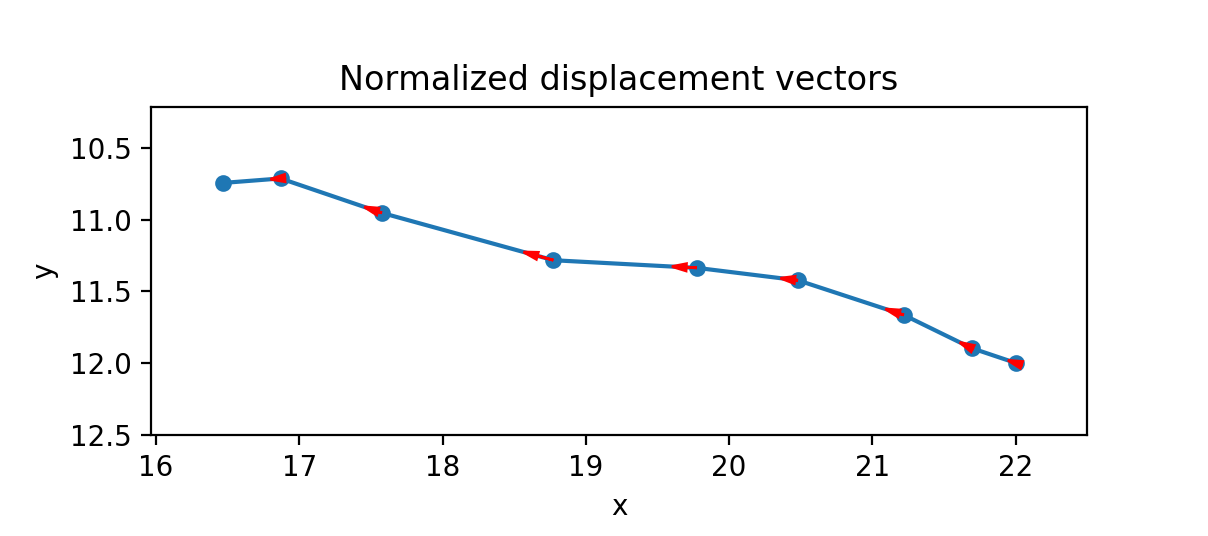

In [7]:
# show line
fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
ax.plot(xs, ys, '.-', ms=10.0)
pad = 0.5
ax.set_xlim(xs.min()-pad, xs.max()+pad); ax.set_ylim(ys.min()-pad, ys.max()+pad);
ax.invert_yaxis()
ax.set_xlabel('x'); ax.set_ylabel('y');
ax.set_title('Normalized displacement vectors')
# annotate points with time
# for t, x, y in zip(np.arange(n_pts), xs, ys):
#     ax.annotate('t={}'.format(t), np.array((x, y))-0.05, fontsize=6)
# annotate points with angle
# for x, y, a in zip(xs, ys, ang):
#     ax.annotate('{:.1f}'.format(a), np.array((x, y))-0.05, fontsize=6)
# show displacement vectors
for x1, y1, x2, y2 in zip(xs[:-1], ys[:-1], P_x, P_y):
    ax.arrow(x1, y1, x2, y2, head_width=0.05, head_length=0.1, linewidth=1.0, 
             fc='r', ec='r', zorder=100, length_includes_head=True)